In [1]:
%matplotlib inline
#---Import libraries
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")


/Users/aishapectyo/anaconda2/lib/python2.7/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Users/aishapectyo/anaconda2/lib/python2.7/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/Users/aishapectyo/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [58]:
#---Read Data
file_ = "avocado.csv"
df = pd.read_csv(file_)

In [59]:
#---Data Exploration
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [60]:
max(df['Date'])

'2018-03-25'

In [61]:
min(df['Date'])

'2015-01-04'

### Data Visualization

In [62]:
#---What's the volume per year?
df['datetime'] = pd.to_datetime(df['Date'])

In [63]:
grouped_data = df.groupby(df['datetime'].dt.year)['Total Volume'].mean().reset_index()

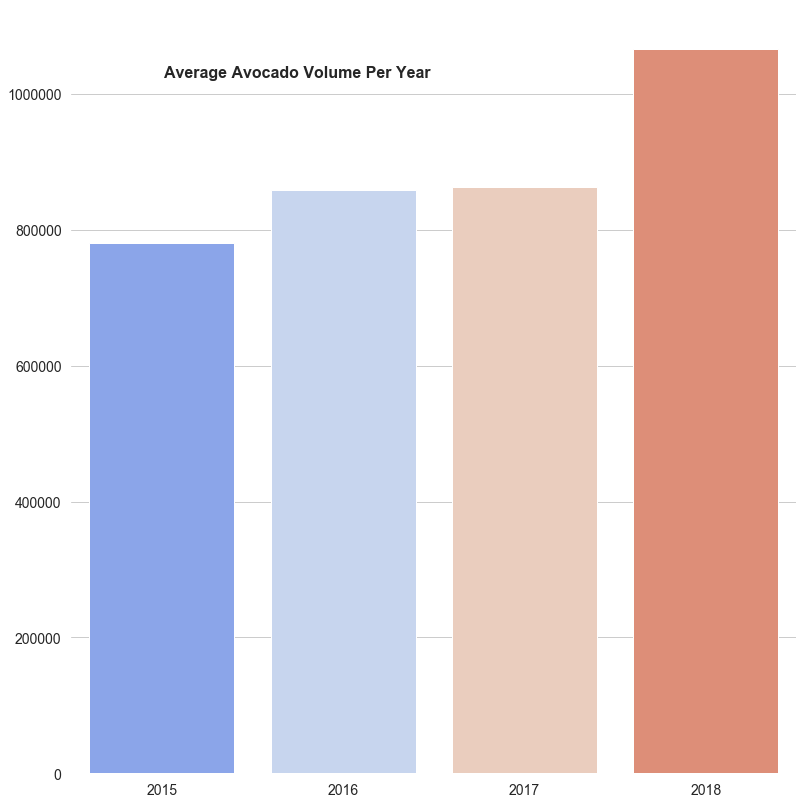

In [64]:
cfont = {'fontname':'Calibri Light'}
sns.set_style("whitegrid")

plt.figure(figsize=(13, 14))   
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()    
plt.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
plt.yticks(fontsize=14)    
plt.xticks(fontsize=14)  
#ax.set_title('Average Avocado Volume Per Year'+"\n", fontsize=20,  **cfont)
ax.text(0.01, 1000000, 'Average Avocado Volume Per Year'+"\n", fontsize=16, fontweight="bold")
sns.barplot(x=grouped_data['datetime'], y=grouped_data['Total Volume'], palette="coolwarm")
ax.set(xlabel='', ylabel='')
plt.savefig("avocado_volume_per_year.jpeg", bbox_inches="tight");


In [9]:
df.sort_values('datetime', inplace=True)
df.set_index('datetime', inplace=True)
#check datatype of index
df.index

DatetimeIndex(['2015-01-04', '2015-01-04', '2015-01-04', '2015-01-04',
               '2015-01-04', '2015-01-04', '2015-01-04', '2015-01-04',
               '2015-01-04', '2015-01-04',
               ...
               '2018-03-25', '2018-03-25', '2018-03-25', '2018-03-25',
               '2018-03-25', '2018-03-25', '2018-03-25', '2018-03-25',
               '2018-03-25', '2018-03-25'],
              dtype='datetime64[ns]', name=u'datetime', length=18249, freq=None)

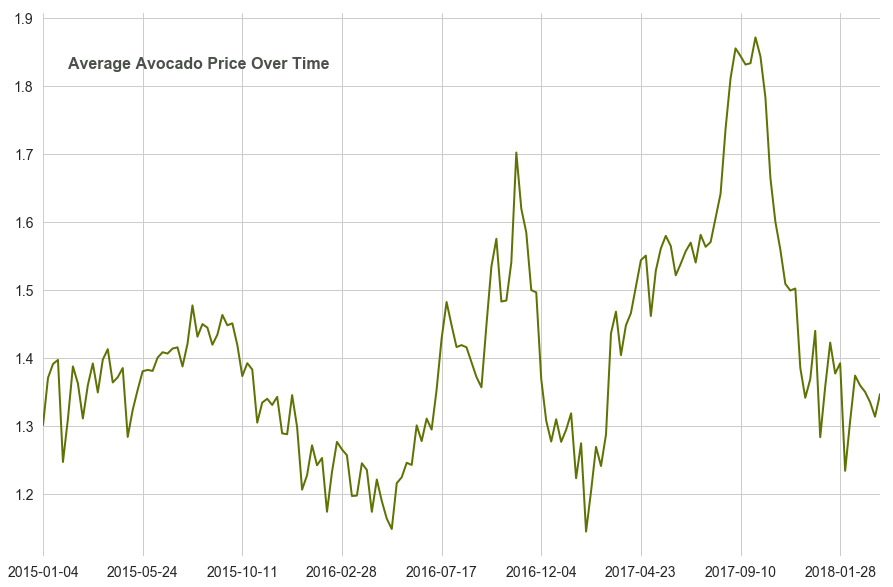

In [20]:
#---Avocado over Time
sns.set_style("whitegrid")
byDate=df.groupby('Date').mean()
plt.figure(figsize=(15,10))
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()    
plt.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
plt.yticks(fontsize=14)    
plt.xticks(fontsize=14)  
ax.text(5, 1.8, 'Average Avocado Price Over Time'+"\n", fontsize=16, fontweight="bold", color='#4b514a')
byDate['AveragePrice'].plot(linewidth=2.0, color='#5d7404')
ax.set(xlabel='', ylabel='')
plt.savefig("avocado_price_per_year.jpeg", bbox_inches="tight");


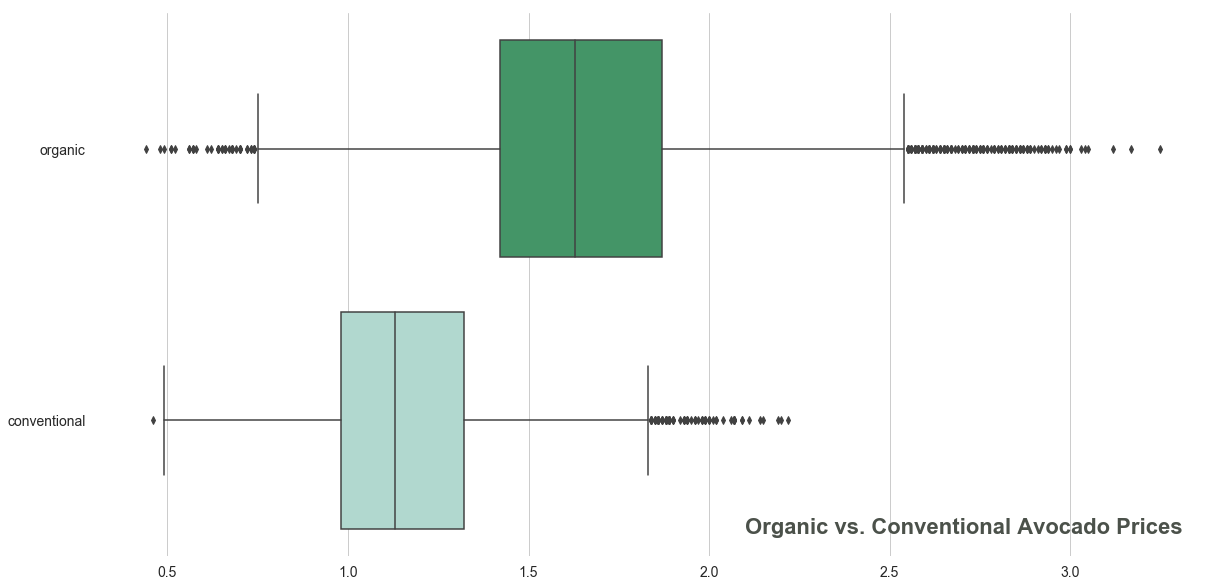

In [38]:
#---Comparison between Organic and Conventional
plt.figure(figsize=(20,10))
ax = plt.subplot(111)    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()    
plt.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
plt.yticks(fontsize=14)    
plt.xticks(fontsize=14)  
ax.text(2.1, 1.5, 'Organic vs. Conventional Avocado Prices'+"\n", fontsize=22, fontweight="bold", color='#4b514a')
sns.boxplot(y="type", x="AveragePrice", data=df, palette = 'BuGn_r')
ax.set(xlabel='', ylabel='')
plt.savefig("avocado_organic_vs_conventional.jpeg", bbox_inches="tight");


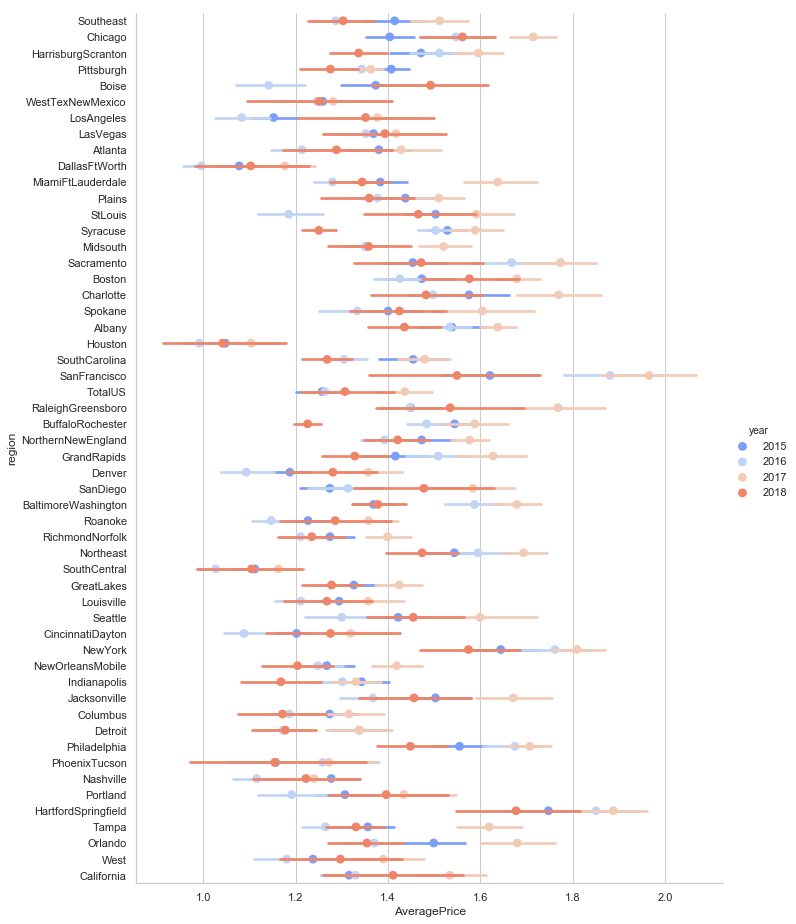

In [27]:
#---Price Per Region Per Year

sns.factorplot('AveragePrice','region',data=df,
                   hue='year',
                   size=13,
                   aspect=0.8,
                   palette='coolwarm',
                   join=False,
              )
ax.set(xlabel='', ylabel='')
plt.savefig("price_per_year_per_region.jpeg", bbox_inches="tight");


### Times Series

In [39]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
datetime,,,,,,,,,,,,,,
2015-01-04,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
2015-01-04,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
2015-01-04,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
2015-01-04,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
2015-01-04,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


In [40]:
df.corr()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Unnamed: 0,1.000000,-0.133008,0.014035,0.017628,0.019829,0.041752,-0.002219,0.000347,-0.009196,-0.011546,-0.171667
AveragePrice,-0.133008,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,0.014035,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,0.017628,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,0.019829,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,0.041752,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.002219,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,0.000347,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.009196,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.011546,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033


In [44]:
from fbprophet import Prophet


In [47]:
#---US Trends
df2 = df[df['region'] == 'TotalUS']
keep = ['AveragePrice', 'Date']
df2 = df2[keep]

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


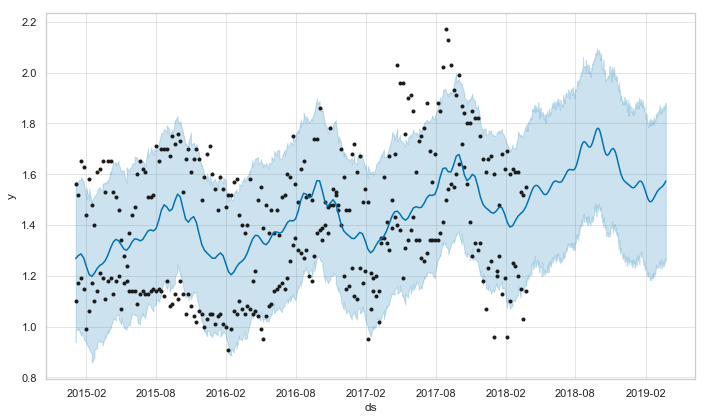

In [69]:
date_price = df2.rename(columns={'Date':'ds', 'AveragePrice':'y'})
m = Prophet()
m.fit(date_price)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
fig1 = m.plot(forecast)
plt.savefig("fig1.jpeg", bbox_inches="tight");


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


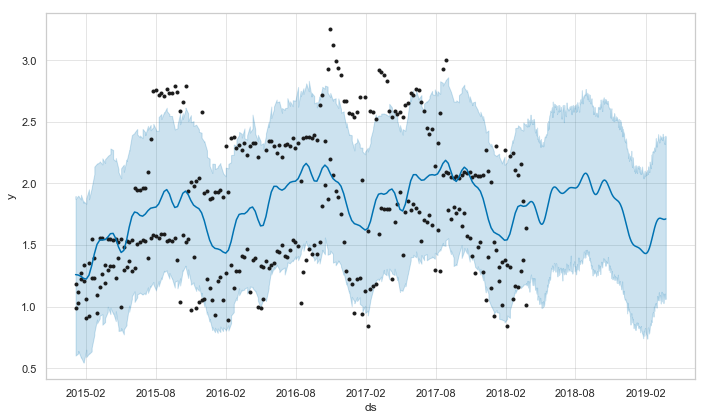

In [70]:
#---SF Trends
df2 = df[df['region'] == 'SanFrancisco']
keep = ['AveragePrice', 'Date']
df2 = df2[keep]
date_price = df2.rename(columns={'Date':'ds', 'AveragePrice':'y'})
m = Prophet()
m.fit(date_price)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
fig1 = m.plot(forecast)
plt.savefig("fig2.jpeg", bbox_inches="tight");


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


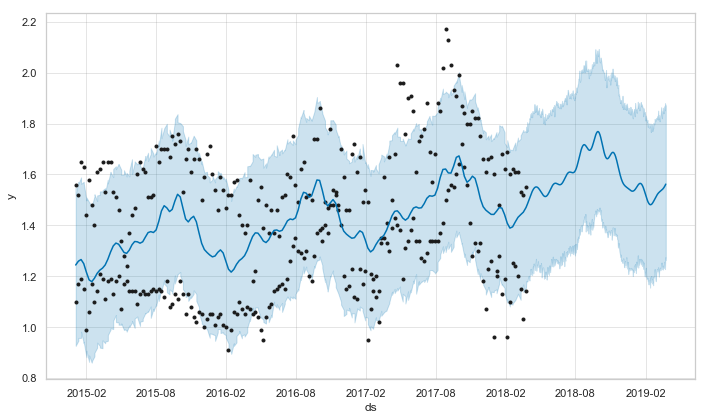

In [71]:
#---Midsouth Trends: Are we catching up?
df2 = df[df['region'] == 'Midsouth']
keep = ['AveragePrice', 'Date']
df2 = df2[keep]
date_price = df2.rename(columns={'Date':'ds', 'AveragePrice':'y'})
m = Prophet()
m.fit(date_price)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
fig1 = m.plot(forecast)
plt.savefig("fig3.jpeg", bbox_inches="tight");
